In [1564]:
import numpy as np

x = np.loadtxt("weights_tract.txt")

In [1565]:
x = np.loadtxt("lengths_tract.txt")

In [1566]:
x.shape

(66, 66)

In [1567]:
thirty_rest = np.loadtxt("30rest.txt", float, delimiter = ",")

In [1568]:
thirty_rest

array([[-0.019213 ,  0.39832  ,  0.76035  , ...,  0.32154  ,  0.14884  ,
        -0.01239  ],
       [ 0.024214 , -0.23516  , -0.47614  , ..., -0.69366  , -0.36313  ,
         0.028063 ],
       [-0.051412 , -0.02052  , -0.0022461, ...,  0.27     ,  0.13797  ,
        -0.012105 ],
       ...,
       [ 0.0029772,  0.11148  ,  0.23889  , ...,  0.40649  ,  0.23497  ,
         0.0088606],
       [ 0.025675 ,  0.046782 ,  0.090447 , ..., -0.52382  , -0.27363  ,
         0.020387 ],
       [ 0.0068168, -0.16816  , -0.29401  , ..., -0.44056  , -0.23925  ,
        -0.0040264]])

In [1569]:
thirty_rest.shape

(66, 36000)

In [1570]:
np.reshape(thirty_rest, (66,30, 1200))

array([[[-1.9213e-02,  3.9832e-01,  7.6035e-01, ...,  4.8259e-01,
          3.0986e-01, -4.7860e-03],
        [ 9.8779e-03,  1.0824e-01,  2.4544e-01, ..., -1.4156e+00,
         -8.3614e-01,  1.6154e-02],
        [-1.7863e-02, -1.1200e-01, -1.8124e-01, ..., -3.4356e-01,
         -2.4087e-01, -2.4911e-03],
        ...,
        [ 1.9815e-02,  9.2445e-01,  1.5818e+00, ...,  6.3453e-01,
          3.6640e-01, -6.5726e-02],
        [ 4.8342e-03,  5.5779e-01,  9.9386e-01, ..., -5.4277e-01,
         -2.9789e-01, -2.3456e-02],
        [-1.3711e-02,  8.9147e-02,  2.0765e-01, ...,  3.2154e-01,
          1.4884e-01, -1.2390e-02]],

       [[ 2.4214e-02, -2.3516e-01, -4.7614e-01, ...,  9.8765e-01,
          5.8650e-01,  3.3178e-02],
        [-4.8668e-03,  3.9001e-01,  6.8447e-01, ..., -5.0064e-01,
         -2.5961e-01, -3.7826e-03],
        [ 2.0298e-02, -2.9040e-01, -5.1543e-01, ...,  1.8496e-01,
          1.3880e-01,  8.2450e-03],
        ...,
        [-2.8212e-02, -8.4754e-01, -1.5550e+00, ...,  

In [1571]:
img = np.corrcoef(thirty_rest)

In [1572]:
import matplotlib.pyplot as plt


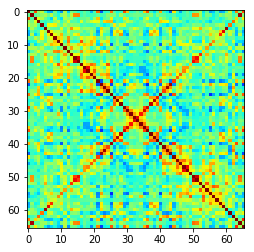

In [1573]:
plt.imshow(img, cmap = "jet")
plt.clim(-1,1)
plt.show()

In [1574]:
weight_matrix = np.loadtxt("weights_tract.txt")

In [1575]:
all_eigenvalues = np.linalg.eig(weight_matrix)

In [1576]:
eigenvalues = all_eigenvalues[0] #non-unit eigenvectors
sorted_eigenvalues = sorted(eigenvalues, reverse = True)
sorted_eigenvalues

[87.03524699974957,
 79.51911643721269,
 68.34643308970304,
 51.71014006637725,
 40.74616179115013,
 35.691328113759724,
 32.42533696587597,
 30.316315726969062,
 23.210872266729965,
 21.438006081710224,
 19.142386749256694,
 16.15346275975984,
 14.45417580142274,
 12.915331049488232,
 12.739766066991562,
 12.41597035775804,
 10.84478811188963,
 9.056649448730425,
 6.846271193719743,
 6.012403561361327,
 4.881117138840589,
 4.758719416513625,
 4.269016964330504,
 3.2849614230767776,
 2.9439262585635877,
 0.4010396245592366,
 0.18076266615356143,
 -0.4189126785543578,
 -0.7801344752404386,
 -1.4121795131548947,
 -1.5675516659950566,
 -2.863977520965392,
 -3.5376230163610853,
 -5.349331341214525,
 -5.4641328730872525,
 -5.869575229154454,
 -6.641373442709362,
 -7.0072571430610076,
 -7.428542249356055,
 -7.82330599511183,
 -8.736727106310362,
 -9.05564762692458,
 -9.402600894001768,
 -9.530507581599704,
 -10.044288502028195,
 -10.319830144285879,
 -11.662816632254017,
 -12.351980132943835

In [1577]:
#max_eigenvalue = np.amax(eigenvalues)
eigen_to_divide_by = sorted_eigenvalues[0]

In [1578]:
new_weight_matrix = weight_matrix / eigen_to_divide_by
new_weight_matrix = new_weight_matrix * .9 

In [1579]:
identity_matrix = np.identity(66)

In [1580]:
weight_minus_id = np.subtract(new_weight_matrix, identity_matrix)

In [1581]:
dt = .72

#all_rs = [random_vector]
#random_vector = np.zeros(66)

In [1582]:
# all_rs.append(random_vector)   dont know whether or not to include the inital random vector

In [1583]:
from statistics import mean
def formulate(mag: int):
    random_vector = np.random.randn(66)
    all_rs = [random_vector]
    norms = []
    for i in range(1199):
        noise = np.random.randn(66) * mag
        norms.append(np.linalg.norm(noise))
        product = np.matmul(weight_minus_id, random_vector)
        dr_dt = np.add(product, noise)
        dr = dr_dt * dt
        random_vector = np.add(random_vector, dr)
        #all_rs.append(random_vector)
        #all_rs = [random_vector] + all_rs
        all_rs.append(random_vector)
    
    rs_over_time = np.asarray(all_rs)
    rs_over_time_transpose = np.transpose(rs_over_time)
    print(mean(norms))
    return rs_over_time_transpose


In [1584]:
thirty_rest = np.reshape(thirty_rest, (30,66,1200))

8.091702024140076
36.15524159175961
16.669340198296478


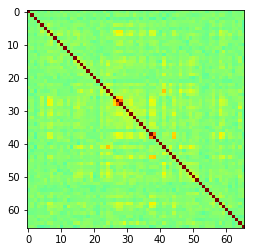

16.19436960109493
35.753049922042216
16.964384975304558


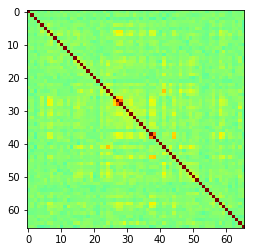

24.223546944742704
36.394484760165895
16.92778517683454


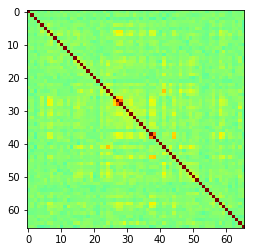

32.41918365085508
36.265872342911145
16.894439176261635


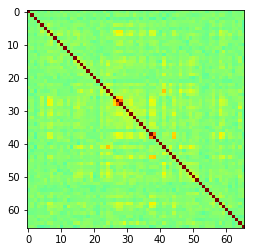

40.34603188985782
36.14877591579589
17.139074720100016


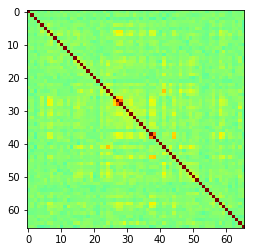

48.235673288778074
36.22144173526283
16.98799910900813


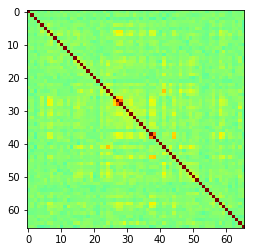

56.86568942138598
36.06869685512153
16.881568806453423


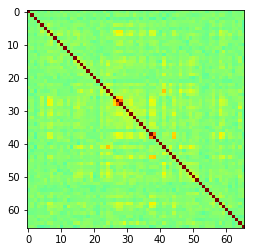

64.67568720640257
36.70789139080142
16.863174896409934


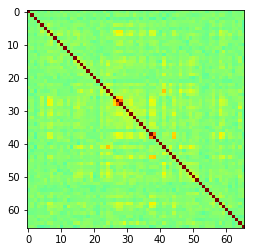

72.98242254948492
35.82985034720595
16.997248048848462


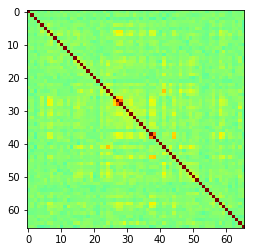

81.0676237663249
35.99323231203654
16.925254450069406


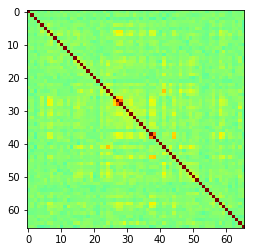

88.99663012566009
36.33671038703245
16.86610758095401


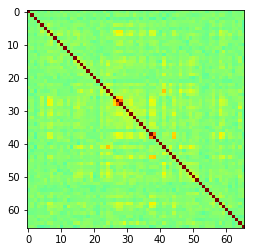

97.17871920495311
36.30966489078053
17.005380581376556


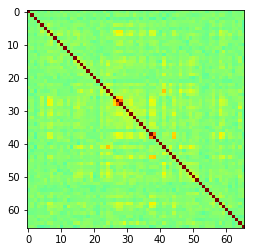

105.3600841064916
35.99762830598519
17.01838374679503


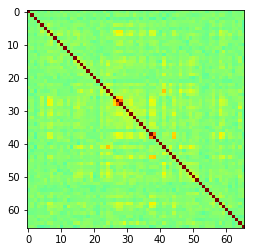

113.72761081254494
36.18708802656328
16.735365645117252


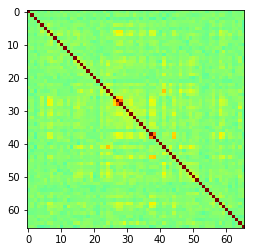

121.52891146757258
35.972062508763635
16.95459784705495


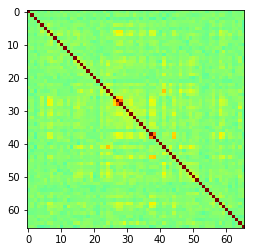

129.58722742027544
36.01606307953922
17.070510576696375


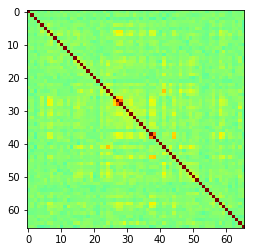

137.06510000422463
36.352147857934455
17.089941613939622


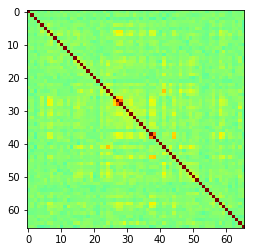

145.63904202715574
35.995310294559566
16.984454573866888


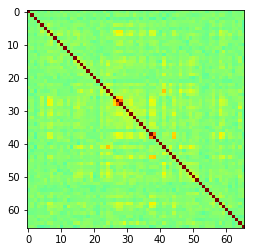

153.85835879239556
36.085731378529836
16.71571042165602


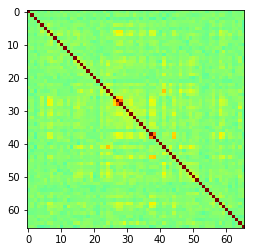

160.94788992528473
36.18594834271953
16.926011969209693


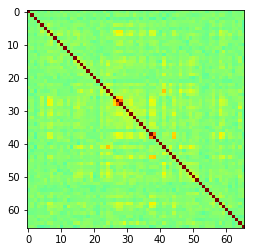

In [1585]:
all_data = []
for i in range(20):
    result_at_1200 = formulate((i+1))
    result_img = np.corrcoef(result_at_1200)
    
    norm_list = []
    distance_from_data_coef = np.linalg.norm(np.subtract(img, result_img))
    coef = np.corrcoef(img, result_img)
    coef_norm = np.linalg.norm(coef)
   
    print(coef_norm)
    print(distance_from_data_coef)
    #(distance from, the coeficient matrix, the the factor the noise vector is multiplied by)
    all_data.append((distance_from_data_coef, coef))
    
    plt.imshow(img1, cmap = "jet")
    plt.clim(-1,1)
    plt.show()
    
    

16.669340198296478


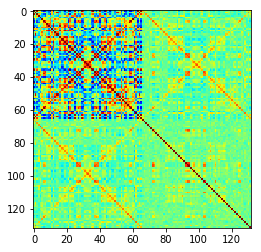

In [1586]:
closest = sorted(all_data)[0]
print(closest[0])
plt.imshow(closest[1], cmap = "jet")
plt.clim(-1,1)
plt.show()



In [1587]:
a = [(0,"z"), (1,"a"), (2,"b"), (0, "a")]
sorted(a)

[(0, 'a'), (0, 'z'), (1, 'a'), (2, 'b')]

In [1588]:
 #   for i in range(30):
  #      norm = np.linalg.norm(np.subtract(thirty_rest[i], result_at_1200))
   #     norm_list.append(norm)
    #print(mean(norm_list))